# Motivation

Our dataset details the location, species, and lifespan of Melbourne's urban forest. It tracks the history of planting trees from 2005 until 2021. Additionally, we substituted our data with satellite photos of Melbourne from 2016 and 2021. Our choice was motivated by the Urban Forest Strategy launched by the City of Melbourne in August 2012, which aimed to create a resilient, healthy, and diverse forest for the future. Our goal was to evaluate the progress of the campaign in the half-way. The results were to inspire the readers, highlight the power of consistent, sustainable strategy, and motivate the citizens of big cities, to support the green initiatives in their communities.

# Basic stats

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import MarkerCluster

In [4]:
df = pd.read_csv("../data/trees-with-species-and-dimensions-urban-forest.csv")
df.head()

,CoM ID,Common Name,Scientific Name,Genus,Family,Diameter Breast Height,Year Planted,Date Planted,Age Description,Useful Life Expectency,Useful Life Expectency Value,Precinct,Located in,UploadDate,CoordinateLocation,Latitude,Longitude,Easting,Northing,geolocation
0,1440992,River red gum,Eucalyptus camaldulensis,Eucalyptus,Myrtaceae,NaN,2009,2009-12-14,NaN,NaN,NaN,NaN,Park,2021-01-10,"-37.789042536009, 144.94750113149306",-37.789043,144.947501,319271.37,5815606.69,"-37.789042536009, 144.94750113149306"
1,1286119,River red gum,Eucalyptus camaldulensis,Eucalyptus,Myrtaceae,80.0,2008,2008-07-16,Mature,31-60 years,60.0,NaN,Park,2021-01-10,"-37.78989006812276, 144.9256959906416",-37.789890,144.925696,317353.24,5815470.25,"-37.78989006812276, 144.9256959906416"
2,1439848,European nettle tree,Celtis australis,Celtis,Cannabaceae,4.0,2009,2009-09-08,Juvenile,31-60 years,60.0,NaN,Street,2021-01-10,"-37.795227592098875, 144.91940533967247",-37.795228,144.919405,316812.46,5814865.65,"-37.795227592098875, 144.91940533967247"
3,1584631,Swamp Sheoak,Casuarina obesa,Casuarina,Casuarinaceae,NaN,2015,2015-06-18,NaN,NaN,NaN,NaN,Park,2021-01-10,"-37.795178798251044, 144.95235531785673",-37.795179,144.952355,319713.76,5814935.15,"-37.795178798251044, 144.95235531785673"
4,1286271,Golden Poplar,Populus x canadensis,Populus,Salicaceae,35.0,2008,2008-12-18,Semi-Mature,31-60 years,60.0,NaN,Street,2021-01-10,"-37.7904175404039, 144.92779056976474",-37.790418,144.927791,317538.99,5815415.81,"-37.7904175404039, 144.92779056976474"


These are 5 first records of our 19MB dataset. The most important features that we planned to use are:

1. The ones describing the trees - Scientific Name, Genus, and Family - as they are crucial for understading the forest diversity.
2. The ones describing time factor - Year/Date Planted - as we want to track the progress of the campaign.
3. The ones describing geo location - Latitude, Longitude - as we want to put our analysis into spatial dimension.

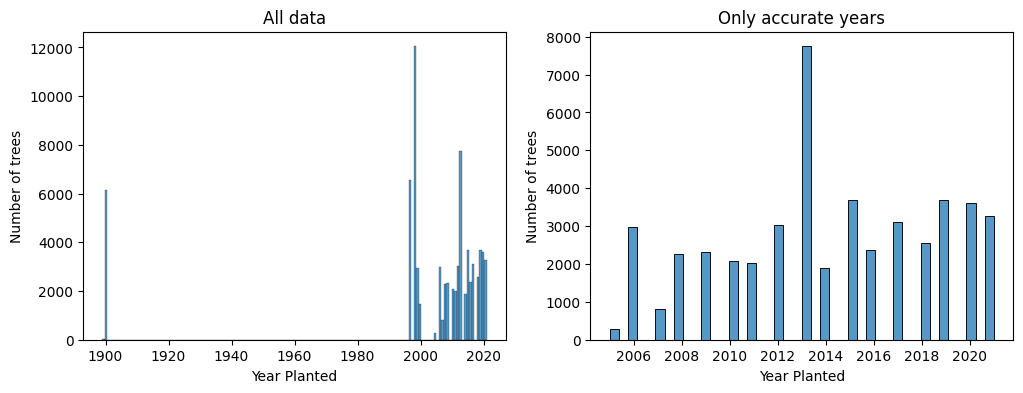

In [16]:
_, axes = plt.subplots(1, 2, figsize=(12, 4))

sns.histplot(df, x='Year Planted', ax=axes[0]).set_title('All data')
sns.histplot(df.loc[df['Year Planted'] > 2004], x='Year Planted', ax=axes[1]).set_title('Only accurate years')
axes[0].set(ylabel='Number of trees')
axes[1].set(ylabel='Number of trees')
plt.show()

C:\Users\jwisn\AppData\Local\Temp\ipykernel_5148\241442470.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(genus_count, x='CoM ID', y='Genus_grouped', orient='h', width=0.7, palette=['tab:green'])
C:\Users\jwisn\AppData\Local\Temp\ipykernel_5148\241442470.py:6: UserWarning: 
The palette list has fewer values (1) than needed (31) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(genus_count, x='CoM ID', y='Genus_grouped', orient='h', width=0.7, palette=['tab:green'])


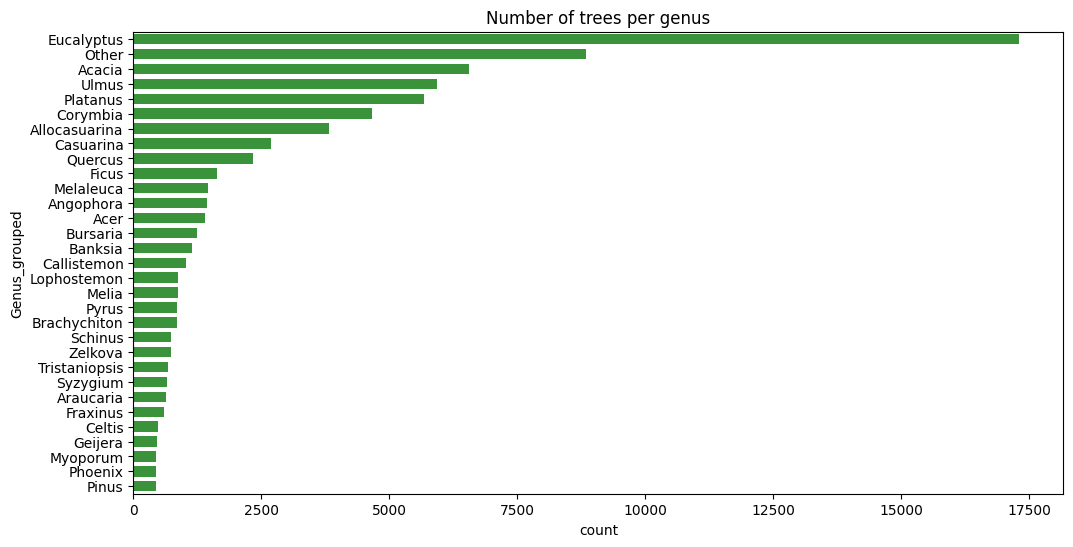

In [17]:
top_genus = df['Genus'].value_counts().head(30).index
df['Genus_grouped'] = df['Genus'].where(df['Genus'].isin(top_genus), 'Other')

genus_count = df.groupby('Genus_grouped')['CoM ID'].count().reset_index().sort_values('CoM ID', ascending=False)
plt.figure(figsize=(12,6))
sns.barplot(genus_count, x='CoM ID', y='Genus_grouped', orient='h', width=0.7, palette=['tab:green'])
plt.title('Number of trees per genus')
plt.xlabel('count')
plt.show()

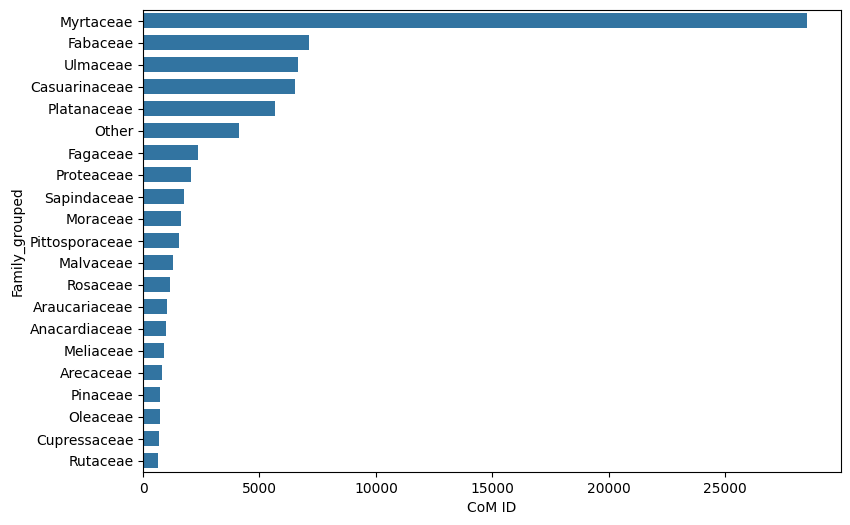

In [18]:
top_family = df['Family'].value_counts().head(20).index
df['Family_grouped'] = df['Family'].where(df['Family'].isin(top_family), 'Other')

family_count = df.groupby('Family_grouped')['CoM ID'].count().reset_index().sort_values('CoM ID', ascending=False)
plt.figure(figsize=(9,6))
sns.barplot(family_count, x='CoM ID', y='Family_grouped', orient='h', width=0.7)
plt.show()

In [6]:
map_center = [-37.820935, 144.946457] # Melbourne coords
tree_map = folium.Map(location=map_center, zoom_start=12)

marker_cluster = MarkerCluster(max_cluster_radius=100).add_to(tree_map)
df_sample = df.sample(1000) 

for i, row in df_sample.iterrows(): # TODO use whole df at the end
    folium.Marker(location=[row['Latitude'], row['Longitude']],
                  popup = folium.Popup( # TODO add more details
                      """Name: {}<br> Year planted: {}"""
                      .format(row['Common Name'], row['Year Planted']),
                      max_width=200)
).add_to(marker_cluster)

tree_map

# Data Analysis

# Genre

# Visualizations

# Discussion

# Contributions